In [1]:
#Importing all the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [2]:
#read_csv to read the dataset
df = pd.read_csv('/Users/mominaali/Desktop/PhD MTSU/2nd Semester/7350/Project/SemesterProject/star_classification.csv')

In [3]:
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [4]:
#seperating the classes
majority = df[df['class'].isin(['GALAXY'])]
minorityQSO = df[df['class'].isin(['QSO'])]
minorityStar = df[df['class'].isin(['STAR'])]

downSampled = resample(majority, replace=False, n_samples=len(minorityQSO)+len(minorityStar), random_state=42)

#As GALAXY class is downsampled here we are concatinating it with the other two minority classes
data_downSampled = pd.concat([downSampled, minorityQSO, minorityStar])

countUnique = data_downSampled['class'].value_counts()
print(countUnique)


class
GALAXY    40555
STAR      21594
QSO       18961
Name: count, dtype: int64


In [5]:
data_downSampled.shape

(81110, 18)

In [6]:
X = data_downSampled.drop("class", axis=1)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81110 entries, 44131 to 99959
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       81110 non-null  float64
 1   alpha        81110 non-null  float64
 2   delta        81110 non-null  float64
 3   u            81110 non-null  float64
 4   g            81110 non-null  float64
 5   r            81110 non-null  float64
 6   i            81110 non-null  float64
 7   z            81110 non-null  float64
 8   run_ID       81110 non-null  int64  
 9   rerun_ID     81110 non-null  int64  
 10  cam_col      81110 non-null  int64  
 11  field_ID     81110 non-null  int64  
 12  spec_obj_ID  81110 non-null  float64
 13  redshift     81110 non-null  float64
 14  plate        81110 non-null  int64  
 15  MJD          81110 non-null  int64  
 16  fiber_ID     81110 non-null  int64  
dtypes: float64(10), int64(7)
memory usage: 11.1 MB


In [8]:
Y = data_downSampled['class']

In [9]:
Y.shape

(81110,)

In [10]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 81110 entries, 44131 to 99959
Series name: class
Non-Null Count  Dtype 
--------------  ----- 
81110 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns = X_train.columns)

X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns = X_test.columns)

In [13]:
# label_encoder = preprocessing.LabelEncoder()

# Y_train_le = label_encoder.fit_transform(Y_train)
# Y_test_le = label_encoder.fit_transform(Y_test)

In [14]:
Y_train_le = Y_train
Y_test_le = Y_test

In [15]:
X_train_sc.shape

(64888, 17)

In [16]:
X_test_sc.shape

(16222, 17)

In [17]:
Y_train_le.shape

(64888,)

In [18]:
Y_test_le.shape

(16222,)

In [19]:
pca = PCA()
pca.fit(X_train_sc)
# X_train_pca = pca.fit_transform(X_train_sc)
# X_test_pca = pca.transform(X_test_sc)


PCA()

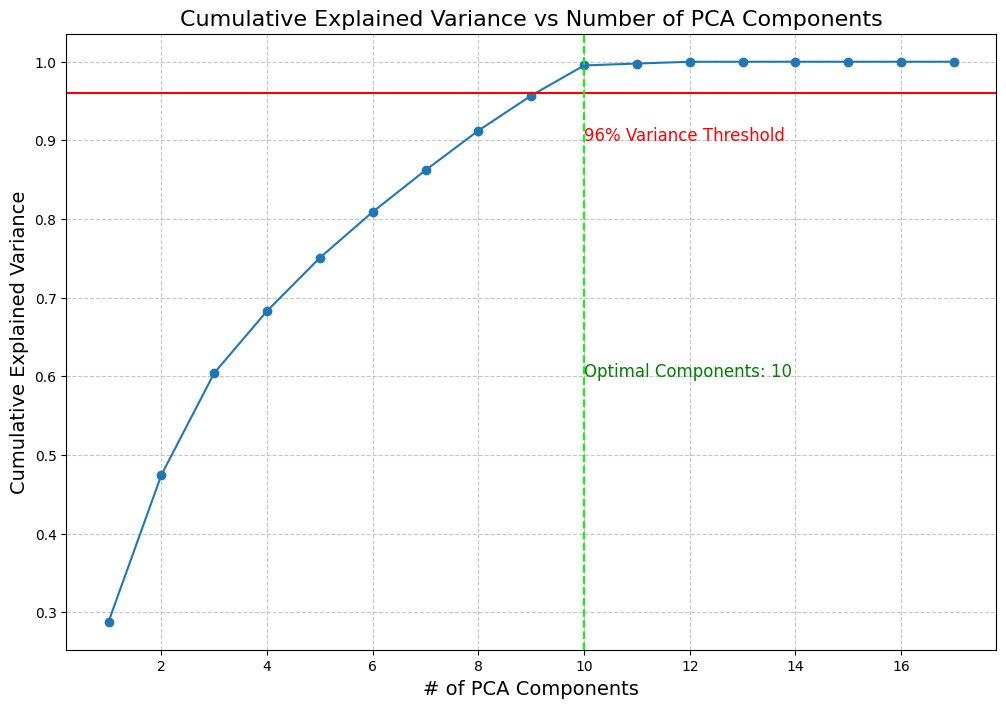

In [20]:
#This code snippet is taken from: https://drlee.io/the-ultimate-step-by-step-guide-to-data-mining-with-pca-and-kmeans-83a2bcfdba7d

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(12, 8))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance vs Number of PCA Components', fontsize=16)
plt.xlabel('# of PCA Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0.96, color='r', linestyle='-')
plt.text(10, 0.9, '96% Variance Threshold', color='red', fontsize=12)

# Determine the number of components that explain at least 95% of the variance
optimal_num_components = len(cumulative_explained_variance[cumulative_explained_variance >= 0.95]) + 1
plt.axvline(x=optimal_num_components, color='lime', linestyle='--')
plt.text(optimal_num_components, 0.6, f'Optimal Components: {optimal_num_components}', color='green', fontsize=12)
plt.show()


In [21]:
pca = PCA(n_components=optimal_num_components)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [22]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, Y_train_le)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_pca)


#RF Downsampling

In [23]:
# Calculate accuracy
accuracy_rf = accuracy_score(Y_test_le, y_pred_rf)
print("Accuracy with Random Forest:", accuracy_rf)


Accuracy with Random Forest: 0.9283072370854395


#RF Upsampling

In [24]:
#read_csv to read the dataset
df = pd.read_csv('/Users/mominaali/Desktop/PhD MTSU/2nd Semester/7350/Project/SemesterProject/star_classification.csv')

In [25]:
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [26]:
#seperating the classes
majority = df[df['class'].isin(['GALAXY'])]
minorityQSO = df[df['class'].isin(['QSO'])]
minorityStar = df[df['class'].isin(['STAR'])]

UpsampledQSO = resample(minorityQSO, replace=True, n_samples=len(majority), random_state=42)
UpsampledStar = resample(minorityStar, replace=True, n_samples=len(majority), random_state=42)

#As GALAXY class is downsampled here we are concatinating it with the other two minority classes
data_upsampled = pd.concat([majority, UpsampledQSO, UpsampledStar])

countUnique = data_upsampled['class'].value_counts()
print(countUnique)


class
GALAXY    59445
QSO       59445
STAR      59445
Name: count, dtype: int64


In [27]:
data_upsampled.shape

(178335, 18)

In [28]:
X = data_upsampled.drop("class", axis=1)

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178335 entries, 0 to 79375
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       178335 non-null  float64
 1   alpha        178335 non-null  float64
 2   delta        178335 non-null  float64
 3   u            178335 non-null  float64
 4   g            178335 non-null  float64
 5   r            178335 non-null  float64
 6   i            178335 non-null  float64
 7   z            178335 non-null  float64
 8   run_ID       178335 non-null  int64  
 9   rerun_ID     178335 non-null  int64  
 10  cam_col      178335 non-null  int64  
 11  field_ID     178335 non-null  int64  
 12  spec_obj_ID  178335 non-null  float64
 13  redshift     178335 non-null  float64
 14  plate        178335 non-null  int64  
 15  MJD          178335 non-null  int64  
 16  fiber_ID     178335 non-null  int64  
dtypes: float64(10), int64(7)
memory usage: 24.5 MB


In [30]:
Y = data_upsampled['class']

In [31]:
Y.shape

(178335,)

In [32]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 178335 entries, 0 to 79375
Series name: class
Non-Null Count   Dtype 
--------------   ----- 
178335 non-null  object
dtypes: object(1)
memory usage: 2.7+ MB


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns = X_train.columns)

X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns = X_test.columns)

In [35]:
# label_encoder = preprocessing.LabelEncoder()

# Y_train_le = label_encoder.fit_transform(Y_train)
# Y_test_le = label_encoder.fit_transform(Y_test)

In [36]:
Y_train_le = Y_train
Y_test_le = Y_test

In [37]:
X_train_sc.shape

(142668, 17)

In [38]:
X_test_sc.shape

(35667, 17)

In [39]:
Y_train_le.shape

(142668,)

In [40]:
Y_test_le.shape

(35667,)

In [41]:
pca = PCA()
pca.fit(X_train_sc)
# X_train_pca = pca.fit_transform(X_train_sc)
# X_test_pca = pca.transform(X_test_sc)


PCA()

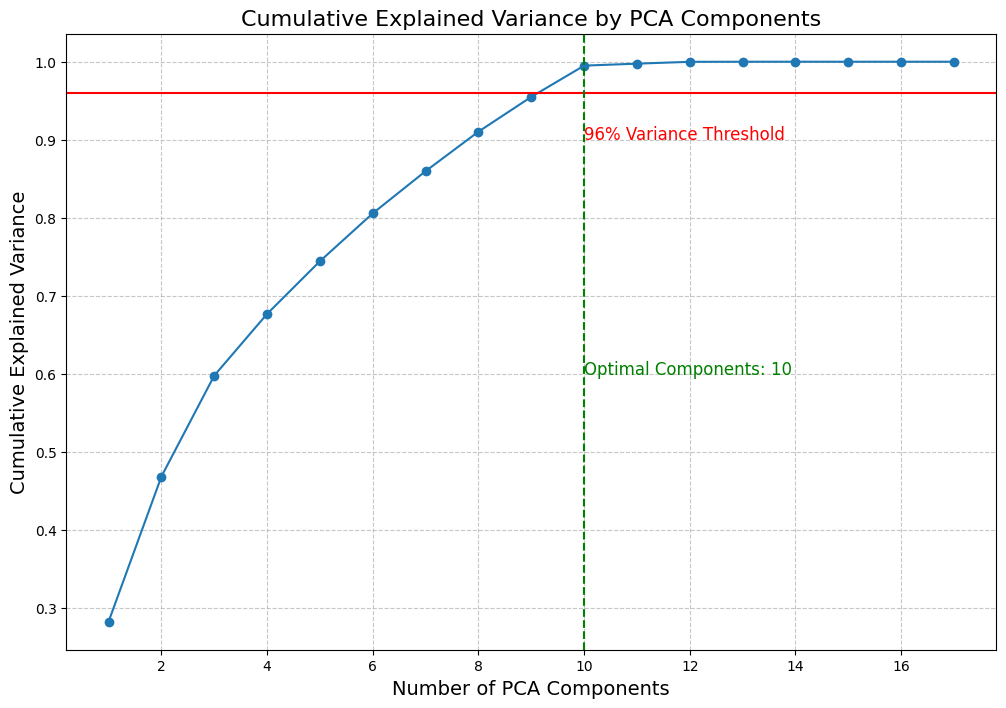

In [42]:
#This code snippet is taken from: https://drlee.io/the-ultimate-step-by-step-guide-to-data-mining-with-pca-and-kmeans-83a2bcfdba7d

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(12, 8))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance by PCA Components', fontsize=16)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0.96, color='r', linestyle='-')
plt.text(10, 0.9, '96% Variance Threshold', color='red', fontsize=12)

# Determine the number of components that explain at least 95% of the variance
optimal_num_components = len(cumulative_explained_variance[cumulative_explained_variance >= 0.95]) + 1
plt.axvline(x=optimal_num_components, color='g', linestyle='--')
plt.text(optimal_num_components, 0.6, f'Optimal Components: {optimal_num_components}', color='green', fontsize=12)
plt.show()


In [43]:
pca = PCA(n_components=optimal_num_components)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [44]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, Y_train_le)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_pca)


#RF upsampling

In [45]:
# Calculate accuracy
accuracy_rf = accuracy_score(Y_test_le, y_pred_rf)
print("Accuracy with Random Forest:", accuracy_rf)


Accuracy with Random Forest: 0.9751310735413687


#RF

In [46]:
#read_csv to read the dataset
df = pd.read_csv('/Users/mominaali/Desktop/PhD MTSU/2nd Semester/7350/Project/SemesterProject/star_classification.csv')

In [47]:
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [48]:
df.shape

(100000, 18)

In [49]:
X = df.drop("class", axis=1)

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  redshift     100000 non-null  float64
 14  plate        100000 non-null  int64  
 15  MJD          100000 non-null  int64  
 16  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7)
memory usage: 13.0 MB


In [51]:
Y = df['class']

In [52]:
Y.shape

(100000,)

In [53]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: class
Non-Null Count   Dtype 
--------------   ----- 
100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns = X_train.columns)

X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns = X_test.columns)

In [56]:
# label_encoder = preprocessing.LabelEncoder()

# Y_train_le = label_encoder.fit_transform(Y_train)
# Y_test_le = label_encoder.fit_transform(Y_test)

In [57]:
Y_train_le = Y_train
Y_test_le = Y_test

In [58]:
X_train_sc.shape

(80000, 17)

In [59]:
X_test_sc.shape

(20000, 17)

In [60]:
Y_train_le.shape

(80000,)

In [61]:
Y_test_le.shape

(20000,)

In [62]:
pca = PCA()
pca.fit(X_train_sc)
# X_train_pca = pca.fit_transform(X_train_sc)
# X_test_pca = pca.transform(X_test_sc)


PCA()

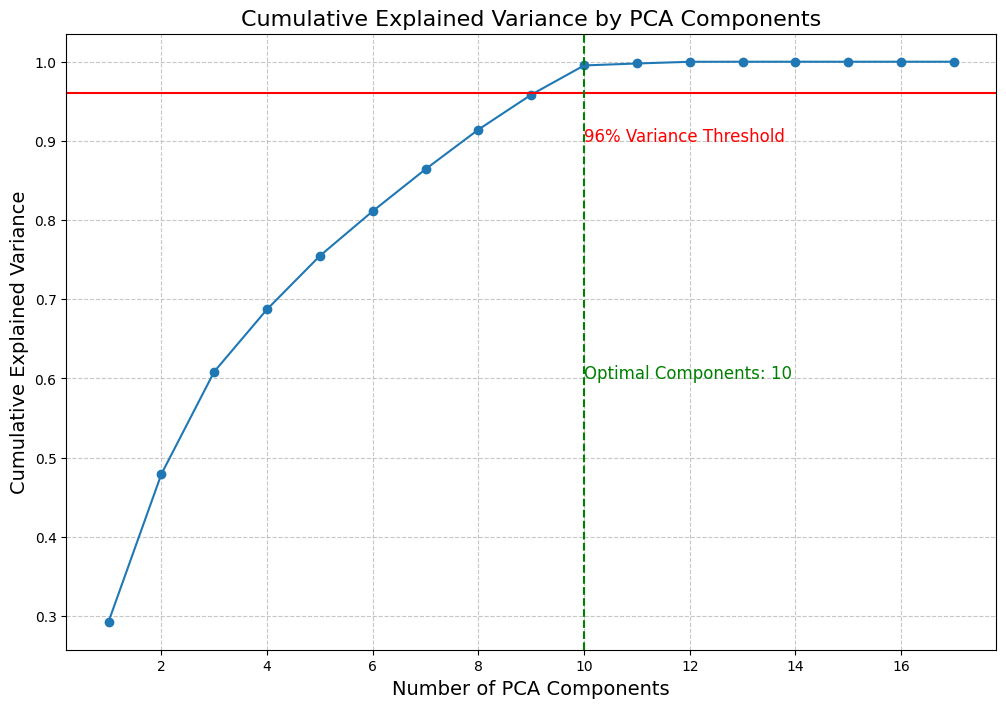

In [63]:
#This code snippet is taken from: https://drlee.io/the-ultimate-step-by-step-guide-to-data-mining-with-pca-and-kmeans-83a2bcfdba7d

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(12, 8))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance by PCA Components', fontsize=16)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0.96, color='r', linestyle='-')
plt.text(10, 0.9, '96% Variance Threshold', color='red', fontsize=12)

# Determine the number of components that explain at least 95% of the variance
optimal_num_components = len(cumulative_explained_variance[cumulative_explained_variance >= 0.95]) + 1
plt.axvline(x=optimal_num_components, color='g', linestyle='--')
plt.text(optimal_num_components, 0.6, f'Optimal Components: {optimal_num_components}', color='green', fontsize=12)
plt.show()


In [64]:
pca = PCA(n_components=optimal_num_components)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [65]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, Y_train_le)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_pca)


In [66]:
# Calculate accuracy
accuracy_rf = accuracy_score(Y_test_le, y_pred_rf)
print("Accuracy with Random Forest:", accuracy_rf)


Accuracy with Random Forest: 0.93255
